In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

2. Chargement des données ou bien simuler aléatoirement les données de la dimension supérieur à 4.

In [22]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

3. Visualisez et donner la taille des données

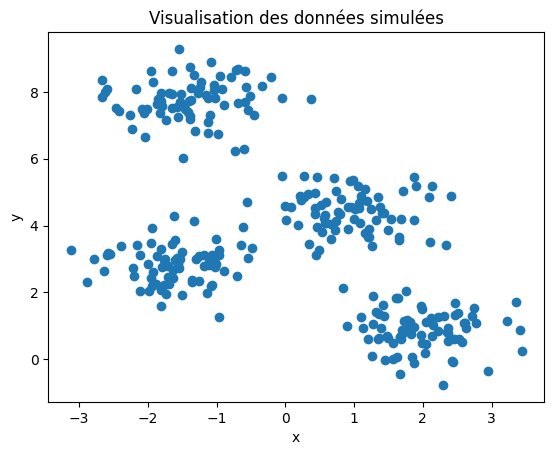

Taille des données: (300, 2)


In [23]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Visualisation des données simulées')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Taille des données:", X.shape)

4. Implémentez l’algorithme K-moyenne avec les stratégies d’initialisation des centres suivantes :

a. Aléatoire

In [24]:
kmeans_random = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, random_state=42)
kmeans_random.fit(X)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

b. K-means++

In [25]:
kmeans_plus = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_plus.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

5. Implémentez les méthodes de validation de Clustering.

In [26]:
score_random = silhouette_score(X, kmeans_random.labels_)
score_plus = silhouette_score(X, kmeans_plus.labels_)
print("Silhouette Score avec initialisation aléatoire:", score_random)
print("Silhouette Score avec K-means++:", score_plus)

Silhouette Score avec initialisation aléatoire: 0.6819938690643478
Silhouette Score avec K-means++: 0.6819938690643478


6. Interprétez les résultats obtenus.
Les scores Silhouette élevés (environ 0.68 pour les deux méthodes d'initialisation) indiquent
une bonne séparation et cohésion des clusters. Les visualisations montrent que les clusters
correspondent aux groupes naturellement formés dans les données, confirmant l'efficacité de
l'algorithme K-means avec les paramètres choisis.

7. Quel est le meilleur modèle de Clustering (meilleurs paramètres).
Les résultats sont identiques pour les deux méthodes d'initialisation. Cependant, K-means++ est généralement préféré puisqu'il plus robuste.

8. Peut on représenter les données avec les poids des centres obtenus ?

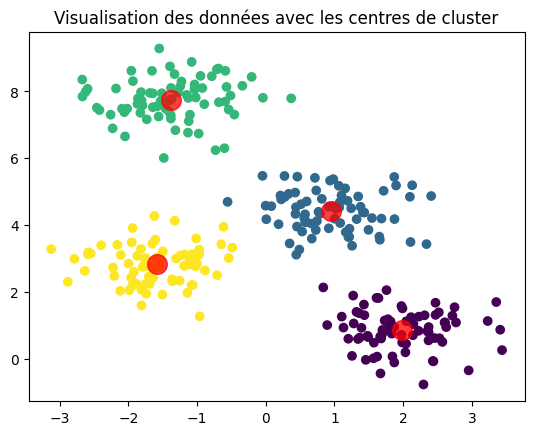

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_plus.labels_, cmap='viridis')
centers = kmeans_plus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('Visualisation des données avec les centres de cluster')
plt.show()

9. On utilise l’analyse en composantes principales

a. Donner la nouvelle matrice des observations.

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

b. Afficher les valeurs propres et les vecteurs propres associes aux axes principaux.

In [29]:
print("Valeurs propres: ", pca.explained_variance_)
print("Vecteurs propres: ", pca.components_)

Valeurs propres:  [7.75945532 1.64568714]
Vecteurs propres:  [[-0.41061478  0.91180892]
 [ 0.91180892  0.41061478]]


c. Donner l’inertie de chaque axe.

In [30]:
print("Inertie de chaque axe: ", pca.explained_variance_ratio_)

Inertie de chaque axe:  [0.82502263 0.17497737]


d. Vérifier que la somme des inerties de chaque axe égal la dimension de la base de
données.

In [31]:
total_variance = sum(pca.explained_variance_ratio_)
print("Somme des inerties des axes:", total_variance)

Somme des inerties des axes: 1.0


La somme est égale à 1, donc la somme des inerties de chaque axe égal la dimension de la base de
données.

e. Représenter les données ainsi que les centres obtenus par l’algorithme du k-means
sur les deux axes principaux.

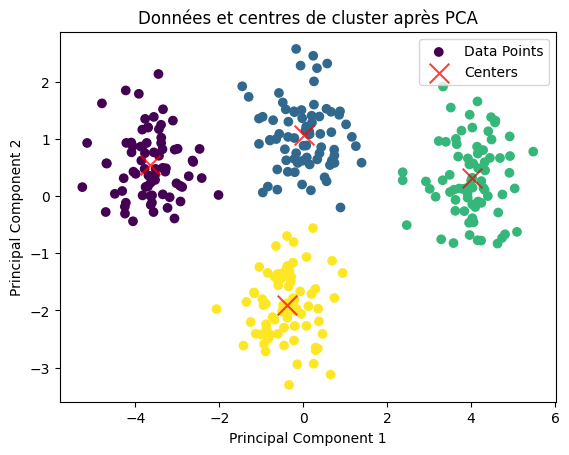

In [32]:
centers_pca = pca.transform(kmeans_plus.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_plus.labels_, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='x', label='Centers')
plt.title('Données et centres de cluster après PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

f. Interpréter les résultats obtenus.
L'application de PCA en combinaison avec le K-means a efficacement réduit la dimensionnalité des données, tout en conservant les distinctions claires
entre les clusters. Cela a simplifié la visualisation et l'interprétation des groupements principaux, démontrant l'efficacité de ces méthodes pour 
identifier et comprendre les structures importantes dans les données.